# Preparation

## Library installation/import

Install and import libraries that are used in multiple sections of the pipeline.

In [1]:
import pandas as pd

## Configuring Twitter API keys

<font color="red">**IMPORTANT NOTE:** Please note that the API keys below are the course leader's own API keys. You are allowed to use it to do some small tests, but please be careful because all students in the class now have a copy of it, and hence the limits can be easily exceeded.</font>

If your group has decided to use Twitter data, you can [apply for your own keys](https://developer.twitter.com/en/apply-for-access).

In [2]:
import tweepy

#auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
# auth.set_access_token(accessToken, accessTokenSecret)

auth = tweepy.OAuthHandler('BcWEliOxF0h6v9VWpUlNtS5nU', 'HfW6WHnnPqB5BkodYKgMTAihGbmEjioJpP3DhAekLLtVeb6xIi')
auth.set_access_token('841021709209731073-rRR8mlOkIw7pLGEnplp03nWwnYOGwJ3', 'Aa2c8dlmUOKzsRRRc0v6gELtKbJFAkcNwNzOe9T6uuCUQ')

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
pip install tweepy==4.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0


In [ ]:
print (tweepy.__version__)

4.12.1


## Downloading of new data set

<font color="red">**IMPORTANT NOTE:** Please do not run the cell below unless intending to download a new data set. If you just want to see what the rest of the code in this notebook produces, you can skip this cell and proceed to the next one (under Data pre-processing/Cleaning), which will read data from the `current_set.csv` file that has been provided to you.</font>

Should you decide to run this cell, you can explore by changing the parameters.

Also, check the [Tweepy API reference](https://docs.tweepy.org/en/latest/api.html) to find out about other ways through which you can retrieve tweets, e.g., by specifying usernames.

**WARNING:** It is likely that the retrieved tweets, which will be displayed in succeeding cells, contain strong language that some might find offensive or disturbing.

In [ ]:
# Collect tweets
#query = "Qatar" + "#MUFC" +  " -filter:retweets" 
#cutoff_date = "2023-03-02" 
searchTerms = "(Qatar AND #MUFC) OR #glazers OR #GlazersSellManUtd OR #QatarIn OR #GlazersOutNow" + "-filter:retweets"
tweets = tweepy.Cursor(api.search_tweets, q=searchTerms, lang="en", tweet_mode = 'extended' ).items(1500)

tweets_list = [[tweet.created_at, tweet.user.screen_name, tweet.user.location, tweet.full_text] for tweet in tweets]

tweets_df = pd.DataFrame(data=tweets_list, columns=['date', 'user', 'location', 'text'])

# A good idea to save downloaded tweets as CSV
tweets_df.to_csv ('current_set.csv', quotechar='"', encoding='utf8', index = False, header=True)

KeyboardInterrupt: ignored

In [ ]:
# Display the dataset
df = pd.read_csv("current_set.csv")
df

,date,user,location,text
0,2023-03-07 12:48:11+00:00,RedCentrall,United Kingdom,🚨🚨| Ten Hag has also put Ajax attacker Mohamme...
1,2023-03-07 12:40:57+00:00,shineparamel,India,@AlSupersport Again the time and moment is sho...
2,2023-03-07 12:40:40+00:00,shineparamel,India,@gazelliott2 Again the time and moment is show...
3,2023-03-07 12:40:20+00:00,shineparamel,India,Again the time and moment is shown for #QatarI...
4,2023-03-07 12:37:28+00:00,Telling88622197,NaN,@AnfieldEdition @LivEchoLFC Meaning no funds @...
...,...,...,...,...
1495,2023-03-03 21:58:56+00:00,bubble72,Tamworth,@Qatari Now fair play you put your head on the...
1496,2023-03-03 21:57:20+00:00,LBardsley44,"Manchester, England",@UnitedStandMUFC @markgoldbridge Get the glaze...
1497,2023-03-03 21:52:37+00:00,mufc7Glazersout,"England, United Kingdom","@YoungArab61 @Richard20049325 Out, out, out! #..."
1498,2023-03-03 21:45:56+00:00,vergiilyes,🕋,@TransfersIntel @AdamCrafton_ @BBCSport #Qatar...


# Data pre-processing

## Cleaning

Below we provide some code for text cleaning. However, we encourage you to think of other ways to clean your data, e.g., by removing hashtags, removing usernames, removing duplicate tweets?

In [ ]:
# # Importing essential libraries
# import nltk
# import string
# from nltk.tokenize import TweetTokenizer
# from nltk.corpus import stopwords
# import re


# # Load the dataset
# tweets_text = pd.read_csv('datasetNLP.csv', quotechar='"', encoding='utf8')
# tweets_text

# # make a list to store the pre-processed tweets
# tweets_list = []

# # Remove stop words
# sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
# my_stop_words=stopwords.words('english')
# my_stop_words.extend(sw_list)

# for tweets in tweets_text['text']:
#     # Lowercase words
#     tweets = tweets.lower()
#     # Remove punctuation
#     no_punc_text=tweets.translate(str.maketrans('','',string.punctuation))
#     # Remove urls
#     no_url_text=re.sub(r'http\S+', '', no_punc_text)
#     # Tokenisation
#     tknzr = TweetTokenizer(strip_handles=True)
#     tweets_tokens=tknzr.tokenize(no_url_text)
#     no_stop_tokens=[word for word in tweets_tokens if not word in my_stop_words]
#     tweets_tokens_joined=' '.join(no_stop_tokens)
#     tweets_list.append(tweets_tokens_joined)
# print(tweets_list)

In [3]:
# Load the regular expression library
import re

# Make sure that line below is uncommented, if you are loading data from a provided/previously saved CSV
tweets_df = pd.read_csv('current_set.csv', quotechar='"', encoding='utf8')


# Remove punctuation
tweets_df['text_processed'] = tweets_df['text'].map(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove unnecessary line breaks
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r"\n", '', x))

# Convert the titles to lowercase
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: x.lower())

# Remove whitespace
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s{2,}', ' ', x))

# Remove hashtags, mentions, and usernames
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\B#\w+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\B@\w+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'^@\w+\s', '', x))

# Remove links
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'http\S+\s\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'https\S+\s\s\S\s\S+\s\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'https+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'tco+', '', x))

# Remove vague letters
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s[s]\s', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s[t]\s', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'co\/\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'^t\s', '', x))


# Print out the first rows 
#print(tweets_df['text_processed'].head()

# Removing duplicate tweets
unique_tweets = list(set(list(tweets_df['text_processed'].values)))
unique_tweets = [t for t in unique_tweets if t]

print(unique_tweets)
#tweets_df

['cantona_collars he shouldnt play for us again free transfer is the solution greenwood mufc', 'day 21 of tweeting until i get marcus rashfords signed shirtmarcusrashford is my favourite player amp i think it would be unreal to have his signed shirt im starting now lets go mufc manutd rashford', ' ten hag will not allow the tired manchester united narrative to take hold in the two training sessions following the late exacting victory over west ham manchester united had lacked zip which was concerningmelissareddy_ mufc', 'may the colors of holi fill our lives with joy and the beautiful game of football with excitement happyholi holi2023 pl premierleague lfc mufc efc thfc lufc afc cfc indianfootball jmiqoipr4g', 'single available southampton h block w3106 fv contact _sufyank tickets to be transferred via pdf or digital wallet to official club members via their membership only mufc manutdfacevalue', 'highlight epl 202222 liverpool v man utdliverpool fc livmun lfc mufc epl ligainggris engl

## Exploration using a word cloud

Generating a word cloud is one way by which you can check whether your data needs any further cleaning.

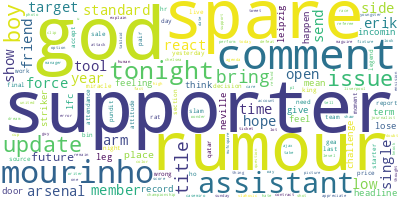

In [4]:
from wordcloud import WordCloud

# join the words of the different tweets together into one string
long_string = ' '.join(unique_tweets)
new_long_string = ' '.join(set(long_string.split(" ")))

# create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# generate a word cloud
wordcloud.generate(new_long_string)

# visualize the word cloud
wordcloud.to_image()

In [10]:
!pip install -q gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 KB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.1 MB/s eta 0:00:00


# Topic Modelling

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# Do you want to modify this by adding more stop words?
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) 
    if word not in stop_words] for doc in texts]


data = tweets_df.text_processed.values.tolist()

data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

# create a dictionary
id2word = corpora.Dictionary(data_words)

# create a corpus
texts = data_words

# convert the corpus into a BoW representation
corpus = [id2word.doc2bow(text) for text in texts]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from pprint import pprint

# set number of topics
num_topics = 5

# build an LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# print keywords in each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# visualise the topics
!pip install pyldavis

In [ ]:
import os
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
  pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
  LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

# Sentiment Analysis

This implementation is based on the lexicon- and rule-based [VADER](https://github.com/cjhutto/vaderSentiment) sentiment analysis tool.

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for tweet_text in unique_tweets:
    vs = analyzer.polarity_scores(tweet_text)
    print(tweet_text + '\t' + str(vs))

# Named Entity Recognition


This implementation is based on [spaCy's model](https://spacy.io/models/en#en_core_web_trf) using contextualised embeddings.

In [8]:
#!pip install spacy-transformers
#!python -m spacy download en_core_web_trf
import spacy
import en_core_web_trf

nlp = spacy.load('en_core_web_trf')


In [9]:
for tweet_text in unique_tweets:
  doc = nlp(tweet_text)
  print(tweet_text)
  for ne in doc.ents:
    print('\tNE found: ', ne.start_char, ne.end_char, ne.label_, tweet_text[ne.start_char:ne.end_char])


Streaming output truncated to the last 5000 lines.
	NE found:  22 36 PERSON mohammed kudus
	NE found:  52 58 DATE summer
	NE found:  71 83 ORG mufc ten hag
	NE found:  91 96 PERSON kudus
	NE found:  101 105 ORG ajax
	NE found:  109 113 DATE 2020
skysportspl we need the nigerian king for the sake of god please erik please mufc gyebx4rgz2
	NE found:  24 32 NORP nigerian
new video ten hag demands immediate reaction manutd vs real betis mufc sunday will haunt us all forever liverpool wont ever let us forget it but united need to immediately move on and ten hag will be demanding that response vs real betis
	NE found:  10 17 PERSON ten hag
	NE found:  45 51 ORG manutd
	NE found:  71 77 DATE sunday
	NE found:  104 113 GPE liverpool
	NE found:  145 151 ORG united
	NE found:  184 191 PERSON ten hag
espnfc gapko 4 goals antony 1 trophy mufc kmvb2jzssy
	NE found:  13 14 CARDINAL 4
	NE found:  21 27 ORG antony
	NE found:  28 29 CARDINAL 1
i actually feel worse today by the result than i did on sun

# Named Entity Linking

This implementation is based on [spaCy Entity Linker](https://github.com/egerber/spacy-entity-linker).

In [14]:
#!pip install spacy-entity-linker
#!python -m spacy download en_core_web_md

import en_core_web_md
from spacy.language import Language

In [13]:
from spacy_entity_linker import EntityLinker
#!python -m spacy_entity_linker "download_knowledge_base"

nlp = spacy.load("en_core_web_md")

#add to pipeline
nlp.add_pipe('entityLinker', last=True)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-08 23:14:51.094486: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-08 23:14:51.094628: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-08 23:14:51.094655: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
entities_list = []

for tweet_text in unique_tweets:
  try:
    doc = nlp(tweet_text)
    print(tweet_text)
    all_linked_entities = doc._.linkedEntities
    for linked_entity in all_linked_entities:
      print(linked_entity.get_url() + ' ' + linked_entity.pretty_string(True))
      entity_data = {'text': tweet_text, 
                     'entity': linked_entity.pretty_string(True), 
                     'url': linked_entity.get_url()}
      entities_list.append(entity_data)
  except:
    pass

entities_df = pd.DataFrame(entities_list)
#output_file = 'linked_entities.csv'
#entities_df.to_csv(output_file, index=False)
entities_df

Streaming output truncated to the last 5000 lines.
https://www.wikidata.org/wiki/Q170156 league  => confederation <union of sovereign states linked by treaties, whose common government does not directly exercise its sovereignty over their territory>
https://www.wikidata.org/wiki/Q2988681 challenge  => achievement <meta-goal in videogaming>
https://www.wikidata.org/wiki/Q2736 football  => association football <team field sport with the objective to score points by shooting a ball into the goal frame of the opponent team>
bruno plays every game he cangives his absolute allhis fan cam in pre season showed how well loved he is and how he knits the team together he was one of the only people to speak up about human rights in qatar at the world cup he is a leadermufc
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q495933 cam  => cam <rotating o

,text,entity,url
0,toney lauded as best penalty taker in the worl...,toney => Toney <unincorporated community in A...,https://www.wikidata.org/wiki/Q7820898
1,toney lauded as best penalty taker in the worl...,penalty => penalty <punishment for breaking t...,https://www.wikidata.org/wiki/Q2068602
2,toney lauded as best penalty taker in the worl...,world => world <planet Earth and all life upo...,https://www.wikidata.org/wiki/Q16502
3,toney lauded as best penalty taker in the worl...,striker => forward <Association Football posi...,https://www.wikidata.org/wiki/Q280658
4,toney lauded as best penalty taker in the worl...,method => subroutine <sequence of computer in...,https://www.wikidata.org/wiki/Q190686
...,...,...,...
7281,mufc are keen to sign kane but know persuadin...,challenge => achievement <meta-goal in videog...,https://www.wikidata.org/wiki/Q2988681
7282,mufc are keen to sign kane but know persuadin...,football => association football <team field ...,https://www.wikidata.org/wiki/Q2736
7283,united youngsters kobbie mainoo and zidane iqb...,united => United Airlines <airline in the Uni...,https://www.wikidata.org/wiki/Q174769
7284,united youngsters kobbie mainoo and zidane iqb...,iqbal => Iqbal <2005 film by Nagesh Kukunoor>,https://www.wikidata.org/wiki/Q3429888


In [ ]:
entities_list = []

for tweet_text in unique_tweets:
  try:
    doc = nlp(tweet_text)
    doc._.linkedEntities.print_super_entities()
  except:
    pass

Streaming output truncated to the last 5000 lines.
human (3) : Casemiro,Caucasian,Casemiro
association football club (2) : Liverpool F.C.,Manchester United F.C.
race (1) : Caucasian
polyphyletic group of organisms known by one particular common name (1) : Caucasian
natural person (1) : Caucasian
omnivore (1) : Caucasian
person (1) : Caucasian
activity (1) : rout
business (1) : Manchester United F.C.
association football team (1) : Manchester United F.C.
concept (1) : sign
property (1) : sign
occupation (1) : gamer
competitive player (1) : gamer
association football club (1) : Liverpool F.C.
professional sports league (1) : Premier League
association football league (1) : Premier League
mental process (1) : dream
association football club (1) : Chelsea F.C.
physical quantity (1) : time
scalar physical quantity (1) : time
series (1) : time
ISQ base quantity (1) : time
film (1) : Iqbal
association football club (1) : Manchester United F.C.
business (1) : Manchester United F.C.
association